In [1]:
######################################
########## DATA PREPARATION ##########
######################################

import numpy as np
import matplotlib.pyplot as plt

"""Script to download the 20 newsgroups text classification set"""
from sklearn.datasets import fetch_20newsgroups

########## TRAIN DATA ##############
# categories = ['alt.atheism' , 'soc.religion.christian' , 'comp.graphics' , 'sci.med'] # to match tutorial
twenty_train = fetch_20newsgroups(subset = 'train', remove=(['headers', 'footers', 'quotes']))
# twenty_train = fetch_20newsgroups(subset = 'train', categories=categories)

########## TEST DATA ##############
twenty_test = fetch_20newsgroups(subset = 'test', remove=(['headers', 'footers', 'quotes']))

"""Define count vectorizer and tf-idf transformations"""

###### Count Vectorizer #######
from sklearn.feature_extraction.text import CountVectorizer
### Filter out these stopwords ####
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
#### Filter: Stopwords, token_pattern filters out the non-letter characters
count_vect = CountVectorizer(analyzer='word', stop_words = stopwords,  token_pattern = r'\b[^\d\W_/]+\b')

########## TFIDF ############
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True,smooth_idf=True) # turned on idf and smooth idf


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive se

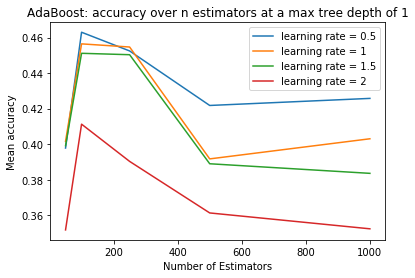

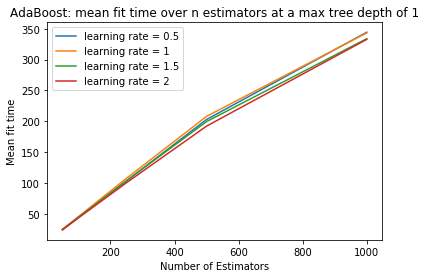

Tree depth 1, learning rate 0.5, best n estimators: 100
Tree depth 1, learning rate 0.5, best score: 0.46296642290364376
Test accuracy of AdaBoost (depth = 1, alpha = 0.5) with best params: 0.4281731279872544
Tree depth 1, learning rate 1, best n estimators: 100
Tree depth 1, learning rate 1, best score: 0.4564257675370479
Test accuracy of AdaBoost (depth = 1, alpha = 1) with best params: 0.4220658523632501
Tree depth 1, learning rate 1.5, best n estimators: 100
Tree depth 1, learning rate 1.5, best score: 0.45112213429978987
Test accuracy of AdaBoost (depth = 1, alpha = 1.5) with best params: 0.4284386617100372
Tree depth 1, learning rate 2, best n estimators: 100
Tree depth 1, learning rate 2, best score: 0.411256545832254
Test accuracy of AdaBoost (depth = 1, alpha = 2) with best params: 0.36086032926181627
Test accuracy of AdaBoost with best params: 0.4317578332448221


In [0]:
###############################################################
### AdaBoost: Comparing Learning Rates with Tree Depth of 1 ###
###############################################################

# packages
import os  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline  
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

decisiontree_clf = DecisionTreeClassifier()
adaboost_clf = AdaBoostClassifier()
adaboost_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', adaboost_clf)])

if not os.path.exists('AdaBoost'):
  os.makedirs('AdaBoost')

# Decision Tree Depth of 1, learning rate of 0.5
adaboost_params_1 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=1)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [0.5]}
adaboost_CV_1 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_1, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV_1.fit(twenty_train.data, twenty_train.target)

# Decision Tree Depth of 1, learning rate of 1
adaboost_params_2 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=1)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [1]}
adaboost_CV_2 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_2, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV_2.fit(twenty_train.data, twenty_train.target)

# Decision Tree Depth of 1, learning rate of 1.5
adaboost_params_3 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=1)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [1.5]}
adaboost_CV_3 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_3, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV_3.fit(twenty_train.data, twenty_train.target)

# Decision Tree Depth of 1, learning rate of 2
adaboost_params_4 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=1)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [2]}
adaboost_CV_4 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_4, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV_4.fit(twenty_train.data, twenty_train.target)


plt.plot(list(adaboost_CV_1.cv_results_.get('param_clf__n_estimators')), adaboost_CV_1.cv_results_.get('mean_test_score'), label = 'learning rate = 0.5')
plt.plot(list(adaboost_CV_2.cv_results_.get('param_clf__n_estimators')), adaboost_CV_2.cv_results_.get('mean_test_score'), label = 'learning rate = 1')
plt.plot(list(adaboost_CV_3.cv_results_.get('param_clf__n_estimators')), adaboost_CV_3.cv_results_.get('mean_test_score'), label = 'learning rate = 1.5')
plt.plot(list(adaboost_CV_4.cv_results_.get('param_clf__n_estimators')), adaboost_CV_4.cv_results_.get('mean_test_score'), label = 'learning rate = 2')

plt.xlabel("Number of Estimators")
plt.ylabel("Mean accuracy")
plt.title("AdaBoost: accuracy over n estimators at a max tree depth of 1")
plt.legend()
plt.savefig("AdaBoost/newsgroup_accuracy_depth_1.png")
plt.show()

plt.plot(list(adaboost_CV_1.cv_results_.get('param_clf__n_estimators')), adaboost_CV_1.cv_results_.get('mean_fit_time'), label = 'learning rate = 0.5')
plt.plot(list(adaboost_CV_2.cv_results_.get('param_clf__n_estimators')), adaboost_CV_2.cv_results_.get('mean_fit_time'), label = 'learning rate = 1')
plt.plot(list(adaboost_CV_3.cv_results_.get('param_clf__n_estimators')), adaboost_CV_3.cv_results_.get('mean_fit_time'), label = 'learning rate = 1.5')
plt.plot(list(adaboost_CV_4.cv_results_.get('param_clf__n_estimators')), adaboost_CV_4.cv_results_.get('mean_fit_time'), label = 'learning rate = 2')

plt.xlabel("Number of Estimators")
plt.ylabel("Mean fit time")
plt.title("AdaBoost: mean fit time over n estimators at a max tree depth of 1")
plt.legend()
plt.savefig("AdaBoost/newsgroup_time_depth_1.png")
plt.show()

print("Tree depth 1, learning rate 0.5, best n estimators: "+ str(adaboost_CV_1.best_params_['clf__n_estimators']))
print("Tree depth 1, learning rate 0.5, best score: "+ str(adaboost_CV_1.best_score_))
print("Test accuracy of AdaBoost (depth = 1, alpha = 0.5) with best params: " + str(adaboost_CV_1.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("Tree depth 1, learning rate 1, best n estimators: "+ str(adaboost_CV_2.best_params_['clf__n_estimators']))
print("Tree depth 1, learning rate 1, best score: "+ str(adaboost_CV_2.best_score_))
print("Test accuracy of AdaBoost (depth = 1, alpha = 1) with best params: " + str(adaboost_CV_2.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("Tree depth 1, learning rate 1.5, best n estimators: "+ str(adaboost_CV_3.best_params_['clf__n_estimators']))
print("Tree depth 1, learning rate 1.5, best score: "+ str(adaboost_CV_3.best_score_))
print("Test accuracy of AdaBoost (depth = 1, alpha = 1.5) with best params: " + str(adaboost_CV_3.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("Tree depth 1, learning rate 2, best n estimators: "+ str(adaboost_CV_4.best_params_['clf__n_estimators']))
print("Tree depth 1, learning rate 2, best score: "+ str(adaboost_CV_4.best_score_))
print("Test accuracy of AdaBoost (depth = 1, alpha = 2) with best params: " + str(adaboost_CV_4.best_estimator_.score(twenty_test.data, twenty_test.target)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive se

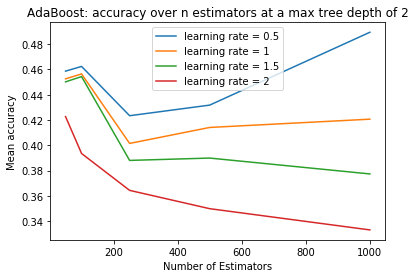

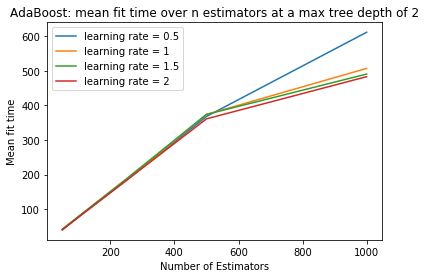

Tree depth 2, learning rate 0.5, best n estimators: 1000
Tree depth 2, learning rate 0.5, best score: 0.4893926163129388
Test accuracy of AdaBoost (depth = 2, alpha = 0.5) with best params: 0.4479553903345725
Tree depth 2, learning rate 1, best n estimators: 100
Tree depth 2, learning rate 1, best score: 0.4564264317414698
Test accuracy of AdaBoost (depth = 2, alpha = 1) with best params: 0.44609665427509293
Tree depth 2, learning rate 1.5, best n estimators: 100
Tree depth 2, learning rate 1.5, best score: 0.45430453303889545
Test accuracy of AdaBoost (depth = 2, alpha = 1.5) with best params: 0.43786510886882635
Tree depth 2, learning rate 2, best n estimators: 50
Tree depth 2, learning rate 2, best score: 0.4226617562424472
Test accuracy of AdaBoost (depth = 2, alpha = 2) with best params: 0.41051513542219864


NameError: ignored

In [0]:
###############################################################
### AdaBoost: Comparing Learning Rates with Tree Depth of 2 ###
###############################################################

decisiontree_clf = DecisionTreeClassifier()
adaboost_clf = AdaBoostClassifier()
adaboost_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', adaboost_clf)])

# Decision Tree Depth of 2, learning rate of 0.5
adaboost_params_1 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=2)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [0.5]}
adaboost_CV_1 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_1, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV_1.fit(twenty_train.data, twenty_train.target)

# Decision Tree Depth of 2, learning rate of 1
adaboost_params_2 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=2)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [1]}
adaboost_CV_2 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_2, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV_2.fit(twenty_train.data, twenty_train.target)

# Decision Tree Depth of 2, learning rate of 1.5
adaboost_params_3 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=2)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [1.5]}
adaboost_CV_3 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_3, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV_3.fit(twenty_train.data, twenty_train.target)

# Decision Tree Depth of 2, learning rate of 2
adaboost_params_4 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=2)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [2]}
adaboost_CV_4 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_4, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV_4.fit(twenty_train.data, twenty_train.target)


plt.plot(list(adaboost_CV_1.cv_results_.get('param_clf__n_estimators')), adaboost_CV_1.cv_results_.get('mean_test_score'), label = 'learning rate = 0.5')
plt.plot(list(adaboost_CV_2.cv_results_.get('param_clf__n_estimators')), adaboost_CV_2.cv_results_.get('mean_test_score'), label = 'learning rate = 1')
plt.plot(list(adaboost_CV_3.cv_results_.get('param_clf__n_estimators')), adaboost_CV_3.cv_results_.get('mean_test_score'), label = 'learning rate = 1.5')
plt.plot(list(adaboost_CV_4.cv_results_.get('param_clf__n_estimators')), adaboost_CV_4.cv_results_.get('mean_test_score'), label = 'learning rate = 2')

plt.xlabel("Number of Estimators")
plt.ylabel("Mean accuracy")
plt.title("AdaBoost: accuracy over n estimators at a max tree depth of 2")
plt.legend()
plt.savefig("AdaBoost/newsgroup_accuracy_depth_2.png")
plt.show()

plt.plot(list(adaboost_CV_1.cv_results_.get('param_clf__n_estimators')), adaboost_CV_1.cv_results_.get('mean_fit_time'), label = 'learning rate = 0.5')
plt.plot(list(adaboost_CV_2.cv_results_.get('param_clf__n_estimators')), adaboost_CV_2.cv_results_.get('mean_fit_time'), label = 'learning rate = 1')
plt.plot(list(adaboost_CV_3.cv_results_.get('param_clf__n_estimators')), adaboost_CV_3.cv_results_.get('mean_fit_time'), label = 'learning rate = 1.5')
plt.plot(list(adaboost_CV_4.cv_results_.get('param_clf__n_estimators')), adaboost_CV_4.cv_results_.get('mean_fit_time'), label = 'learning rate = 2')

plt.xlabel("Number of Estimators")
plt.ylabel("Mean fit time")
plt.title("AdaBoost: mean fit time over n estimators at a max tree depth of 2")
plt.legend()
plt.savefig("AdaBoost/newsgroup_time_depth_2.png")
plt.show()

print("Tree depth 2, learning rate 0.5, best n estimators: "+ str(adaboost_CV_1.best_params_['clf__n_estimators']))
print("Tree depth 2, learning rate 0.5, best score: "+ str(adaboost_CV_1.best_score_))
print("Test accuracy of AdaBoost (depth = 2, alpha = 0.5) with best params: " + str(adaboost_CV_1.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("Tree depth 2, learning rate 1, best n estimators: "+ str(adaboost_CV_2.best_params_['clf__n_estimators']))
print("Tree depth 2, learning rate 1, best score: "+ str(adaboost_CV_2.best_score_))
print("Test accuracy of AdaBoost (depth = 2, alpha = 1) with best params: " + str(adaboost_CV_2.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("Tree depth 2, learning rate 1.5, best n estimators: "+ str(adaboost_CV_3.best_params_['clf__n_estimators']))
print("Tree depth 2, learning rate 1.5, best score: "+ str(adaboost_CV_3.best_score_))
print("Test accuracy of AdaBoost (depth = 2, alpha = 1.5) with best params: " + str(adaboost_CV_3.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("Tree depth 2, learning rate 2, best n estimators: "+ str(adaboost_CV_4.best_params_['clf__n_estimators']))
print("Tree depth 2, learning rate 2, best score: "+ str(adaboost_CV_4.best_score_))
print("Test accuracy of AdaBoost (depth = 2, alpha = 2) with best params: " + str(adaboost_CV_4.best_estimator_.score(twenty_test.data, twenty_test.target)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive se

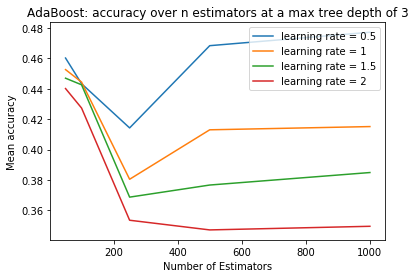

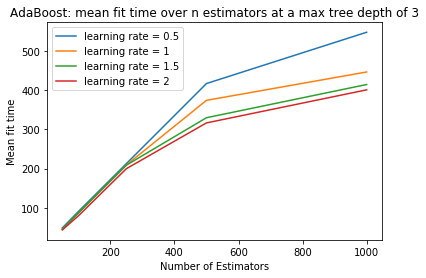

Tree depth 3, learning rate 0.5, best n estimators: 1000
Tree depth 3, learning rate 0.5, best score: 0.4771965728614669
Test accuracy of AdaBoost (depth = 3, alpha = 0.5) with best params: 0.43799787573021776
Tree depth 3, learning rate 1, best n estimators: 50
Tree depth 3, learning rate 1, best score: 0.4526246037727592
Test accuracy of AdaBoost (depth = 3, alpha = 1) with best params: 0.42604885820499205
Tree depth 3, learning rate 1.5, best n estimators: 50
Tree depth 3, learning rate 1.5, best score: 0.4469686686960065
Test accuracy of AdaBoost (depth = 3, alpha = 1.5) with best params: 0.4348114710568242
Tree depth 3, learning rate 2, best n estimators: 50
Tree depth 3, learning rate 2, best score: 0.4401648320949828
Test accuracy of AdaBoost (depth = 3, alpha = 2) with best params: 0.42379182156133827


In [2]:
###############################################################
### AdaBoost: Comparing Learning Rates with Tree Depth of 3 ###
###############################################################

decisiontree_clf = DecisionTreeClassifier()
adaboost_clf = AdaBoostClassifier()
adaboost_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', adaboost_clf)])

# Decision Tree Depth of 3, learning rate of 0.5
adaboost_params_1 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=3)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [0.5]}
adaboost_CV_1 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_1, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV_1.fit(twenty_train.data, twenty_train.target)

# Decision Tree Depth of 3, learning rate of 1
adaboost_params_2 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=3)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [1]}
adaboost_CV_2 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_2, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV_2.fit(twenty_train.data, twenty_train.target)

# Decision Tree Depth of 3, learning rate of 1.5
adaboost_params_3 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=3)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [1.5]}
adaboost_CV_3 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_3, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV_3.fit(twenty_train.data, twenty_train.target)

# Decision Tree Depth of 3, learning rate of 2
adaboost_params_4 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=3)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [2]}
adaboost_CV_4 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_4, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV_4.fit(twenty_train.data, twenty_train.target)


plt.plot(list(adaboost_CV_1.cv_results_.get('param_clf__n_estimators')), adaboost_CV_1.cv_results_.get('mean_test_score'), label = 'learning rate = 0.5')
plt.plot(list(adaboost_CV_2.cv_results_.get('param_clf__n_estimators')), adaboost_CV_2.cv_results_.get('mean_test_score'), label = 'learning rate = 1')
plt.plot(list(adaboost_CV_3.cv_results_.get('param_clf__n_estimators')), adaboost_CV_3.cv_results_.get('mean_test_score'), label = 'learning rate = 1.5')
plt.plot(list(adaboost_CV_4.cv_results_.get('param_clf__n_estimators')), adaboost_CV_4.cv_results_.get('mean_test_score'), label = 'learning rate = 2')

plt.xlabel("Number of Estimators")
plt.ylabel("Mean accuracy")
plt.title("AdaBoost: accuracy over n estimators at a max tree depth of 3")
plt.legend()
plt.savefig("AdaBoost/newsgroup_accuracy_depth_3.png")
plt.show()

plt.plot(list(adaboost_CV_1.cv_results_.get('param_clf__n_estimators')), adaboost_CV_1.cv_results_.get('mean_fit_time'), label = 'learning rate = 0.5')
plt.plot(list(adaboost_CV_2.cv_results_.get('param_clf__n_estimators')), adaboost_CV_2.cv_results_.get('mean_fit_time'), label = 'learning rate = 1')
plt.plot(list(adaboost_CV_3.cv_results_.get('param_clf__n_estimators')), adaboost_CV_3.cv_results_.get('mean_fit_time'), label = 'learning rate = 1.5')
plt.plot(list(adaboost_CV_4.cv_results_.get('param_clf__n_estimators')), adaboost_CV_4.cv_results_.get('mean_fit_time'), label = 'learning rate = 2')

plt.xlabel("Number of Estimators")
plt.ylabel("Mean fit time")
plt.title("AdaBoost: mean fit time over n estimators at a max tree depth of 3")
plt.legend()
plt.savefig("AdaBoost/newsgroup_time_depth_3.png")
plt.show()

print("Tree depth 3, learning rate 0.5, best n estimators: "+ str(adaboost_CV_1.best_params_['clf__n_estimators']))
print("Tree depth 3, learning rate 0.5, best score: "+ str(adaboost_CV_1.best_score_))
print("Test accuracy of AdaBoost (depth = 3, alpha = 0.5) with best params: " + str(adaboost_CV_1.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("Tree depth 3, learning rate 1, best n estimators: "+ str(adaboost_CV_2.best_params_['clf__n_estimators']))
print("Tree depth 3, learning rate 1, best score: "+ str(adaboost_CV_2.best_score_))
print("Test accuracy of AdaBoost (depth = 3, alpha = 1) with best params: " + str(adaboost_CV_2.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("Tree depth 3, learning rate 1.5, best n estimators: "+ str(adaboost_CV_3.best_params_['clf__n_estimators']))
print("Tree depth 3, learning rate 1.5, best score: "+ str(adaboost_CV_3.best_score_))
print("Test accuracy of AdaBoost (depth = 3, alpha = 1.5) with best params: " + str(adaboost_CV_3.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("Tree depth 3, learning rate 2, best n estimators: "+ str(adaboost_CV_4.best_params_['clf__n_estimators']))
print("Tree depth 3, learning rate 2, best score: "+ str(adaboost_CV_4.best_score_))
print("Test accuracy of AdaBoost (depth = 3, alpha = 2) with best params: " + str(adaboost_CV_4.best_estimator_.score(twenty_test.data, twenty_test.target)))

In [0]:
###############################################################
### AdaBoost: Comparing Learning Rates with Tree Depth of 4 ###
###############################################################

decisiontree_clf = DecisionTreeClassifier()
adaboost_clf = AdaBoostClassifier()
adaboost_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', adaboost_clf)])

# Decision Tree Depth of 4, learning rate of 0.5
adaboost_params_1 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=4)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [0.5]}
adaboost_CV_1 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_1, cv=5, n_jobs=-1) # 5-fold cross-val
adaboost_CV_1.fit(twenty_train.data, twenty_train.target)

# Decision Tree Depth of 4, learning rate of 1
adaboost_params_2 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=4)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [1]}
adaboost_CV_2 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_2, cv=5, n_jobs=-1) # 5-fold cross-val
adaboost_CV_2.fit(twenty_train.data, twenty_train.target)

# Decision Tree Depth of 4, learning rate of 1.5
adaboost_params_3 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=4)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [1.5]}
adaboost_CV_3 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_3, cv=5, n_jobs=-1) # 5-fold cross-val
adaboost_CV_3.fit(twenty_train.data, twenty_train.target)

# Decision Tree Depth of 4, learning rate of 2
adaboost_params_4 = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=4)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [2]}
adaboost_CV_4 =  RandomizedSearchCV(adaboost_pipeline, adaboost_params_4, cv=5, n_jobs=-1) # 5-fold cross-val
adaboost_CV_4.fit(twenty_train.data, twenty_train.target)


plt.plot(list(adaboost_CV_1.cv_results_.get('param_clf__n_estimators')), adaboost_CV_1.cv_results_.get('mean_test_score'), label = 'learning rate = 0.5')
plt.plot(list(adaboost_CV_2.cv_results_.get('param_clf__n_estimators')), adaboost_CV_2.cv_results_.get('mean_test_score'), label = 'learning rate = 1')
plt.plot(list(adaboost_CV_3.cv_results_.get('param_clf__n_estimators')), adaboost_CV_3.cv_results_.get('mean_test_score'), label = 'learning rate = 1.5')
plt.plot(list(adaboost_CV_4.cv_results_.get('param_clf__n_estimators')), adaboost_CV_4.cv_results_.get('mean_test_score'), label = 'learning rate = 2')

plt.xlabel("Number of Estimators")
plt.ylabel("Mean accuracy")
plt.title("AdaBoost: accuracy over n estimators at a max tree depth of 4")
plt.legend()
plt.savefig("AdaBoost/newsgroup_accuracy_depth_4.png")
plt.show()

plt.plot(list(adaboost_CV_1.cv_results_.get('param_clf__n_estimators')), adaboost_CV_1.cv_results_.get('mean_fit_time'), label = 'learning rate = 0.5')
plt.plot(list(adaboost_CV_2.cv_results_.get('param_clf__n_estimators')), adaboost_CV_2.cv_results_.get('mean_fit_time'), label = 'learning rate = 1')
plt.plot(list(adaboost_CV_3.cv_results_.get('param_clf__n_estimators')), adaboost_CV_3.cv_results_.get('mean_fit_time'), label = 'learning rate = 1.5')
plt.plot(list(adaboost_CV_4.cv_results_.get('param_clf__n_estimators')), adaboost_CV_4.cv_results_.get('mean_fit_time'), label = 'learning rate = 2')

plt.xlabel("Number of Estimators")
plt.ylabel("Mean fit time")
plt.title("AdaBoost: mean fit time over n estimators at a max tree depth of 4")
plt.legend()
plt.savefig("AdaBoost/newsgroup_time_depth_4.png")
plt.show()

print("Tree depth 4, learning rate 0.5, best n estimators: "+ str(adaboost_CV_1.best_params_['clf__n_estimators']))
print("Tree depth 4, learning rate 0.5, best score: "+ str(adaboost_CV_1.best_score_))
print("Test accuracy of AdaBoost (depth = 4, alpha = 0.5) with best params: " + str(adaboost_CV_1.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("Tree depth 4, learning rate 1, best n estimators: "+ str(adaboost_CV_2.best_params_['clf__n_estimators']))
print("Tree depth 4, learning rate 1, best score: "+ str(adaboost_CV_2.best_score_))
print("Test accuracy of AdaBoost (depth = 4, alpha = 1) with best params: " + str(adaboost_CV_2.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("Tree depth 4, learning rate 1.5, best n estimators: "+ str(adaboost_CV_3.best_params_['clf__n_estimators']))
print("Tree depth 4, learning rate 1.5, best score: "+ str(adaboost_CV_3.best_score_))
print("Test accuracy of AdaBoost (depth = 4, alpha = 1.5) with best params: " + str(adaboost_CV_3.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("Tree depth 4, learning rate 2, best n estimators: "+ str(adaboost_CV_4.best_params_['clf__n_estimators']))
print("Tree depth 4, learning rate 2, best score: "+ str(adaboost_CV_4.best_score_))
print("Test accuracy of AdaBoost (depth = 4, alpha = 2) with best params: " + str(adaboost_CV_4.best_estimator_.score(twenty_test.data, twenty_test.target)))

'''
### AdaBoost CV
adaboost_CV =  RandomizedSearchCV(adaboost_pipeline, adaboost_params, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV.fit(twenty_train.data, twenty_train.target)
print(adaboost_CV.cv_results_)


adaboost_params = {'clf__base_estimator': [DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=4)], 'clf__n_estimators': [50,100,250,500,1000], 'clf__learning_rate': [0.5,1,1.5,2]}

### AdaBoost CV
adaboost_CV =  RandomizedSearchCV(adaboost_pipeline, adaboost_params, cv=5, n_jobs=4) # 5-fold cross-val
adaboost_CV.fit(twenty_train.data, twenty_train.target)
print(adaboost_CV.cv_results_)
'''
print("Test accuracy of AdaBoost with best params: " + str(adaboost_CV.best_estimator_.score(twenty_test.data, twenty_test.target)))